# WALRUS Sales Data and Artist Demographics Analysis

## Section 1: Introduction and Setup

### 1.1 Introduction

This Jupyter notebook uses simulated sales data for the WALRUS art gallery. I did not use the real data to preserve the privacy of the artists. Artist names have been replaced with identification numbers. The simulated values are close approximations to the real sales trends and artist demographics I experienced while operating this gallery, whose mission statement was to better represent the local community and promote artists of color.

This notebook is designed for potential employers to assess my proficiency in data exploration and visualization.

### 1.2 Setup and Import Libraries

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set default plotting style for better visualizations
sns.set(style="whitegrid")

### 1.3 Load the Data

In [2]:
file_path = 'WALRUS_sales.csv'
sales_data = pd.read_csv(file_path)

### 1.4 Initial Data Exploration

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
sales_data.head()

First few rows of the dataset:


,Date,Year,Month,Artist,Sale,Day_of_week
0,1/2/2021,2021.0,1.0,38,110,Saturday
1,1/2/2021,NaN,1.0,38,110,Saturday
2,1/3/2021,2021.0,1.0,40,$20.00,Sunday
3,1/3/2021,2021.0,1.0,37,530,Sunday
4,1/8/2021,2021.0,1.0,37,440,Friday


In [4]:
sales_data.Sale.head(10)

0         110
1         110
2     $20.00 
3         530
4         440
5     $35.00 
6    $180.00 
7     $70.00 
8          60
9         100
Name: Sale, dtype: object

In [5]:
# Display basic information about the dataset
print("\nInformation about the dataset:")
sales_data.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2721 non-null   object 
 1   Year         2715 non-null   float64
 2   Month        2718 non-null   float64
 3   Artist       2721 non-null   int64  
 4   Sale         2721 non-null   object 
 5   Day_of_week  2721 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 127.7+ KB


In [6]:
# Display summary statistics
print("\nSummary statistics:")
sales_data.describe()


Summary statistics:


,Year,Month,Artist
count,2715.000000,2718.000000,2721.000000
mean,2022.008840,7.223326,28.722528
std,0.814792,3.246211,14.396965
min,2021.000000,1.000000,2.000000
25%,2021.000000,5.000000,17.000000
50%,2022.000000,7.000000,33.000000
75%,2023.000000,10.000000,41.000000
max,2023.000000,12.000000,52.000000


In [7]:
# Check for missing values
print("\nMissing values:")
print(sales_data.isnull().sum())


Missing values:
Date           0
Year           6
Month          3
Artist         0
Sale           0
Day_of_week    0
dtype: int64


## Section 2: Data Cleaning

### 2.1 Data Type Check

In [8]:
# Display data types of each column
print("\nData types of each column:")
print(sales_data.dtypes)


Data types of each column:
Date            object
Year           float64
Month          float64
Artist           int64
Sale            object
Day_of_week     object
dtype: object


### 2.2 Addressing Data Types

In [9]:
# Convert 'Date' column to datetime type for better time-related analysis
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Removing the '$' and ',' from 'Sale' then convert 'Sale' column to float type for better sales analysis
sales_data['Sale'] = sales_data['Sale'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)

### 2.3 Handling Missing Values

In [10]:
# Fill missing values in 'Year' and 'Month' using information from the 'Date' column
# Fill the single missing value in 'Day_of_week' using information from the 'Date' column
sales_data['Year'].fillna(sales_data['Date'].dt.year, inplace=True)
sales_data['Month'].fillna(sales_data['Date'].dt.month, inplace=True)
sales_data['Day_of_week'].fillna(sales_data['Date'].dt.day_name(), inplace=True)

### 2.4 Confirming Changes

In [11]:
# Confirm changes in data types and missing values
print("\nConfirmed data types after conversion:")
print(sales_data.dtypes)


Confirmed data types after conversion:
Date           datetime64[ns]
Year                  float64
Month                 float64
Artist                  int64
Sale                  float64
Day_of_week            object
dtype: object


In [12]:
print("\nMissing values after handling:")
print(sales_data.isnull().sum())
sales_data.head()


Missing values after handling:
Date           0
Year           0
Month          0
Artist         0
Sale           0
Day_of_week    0
dtype: int64


,Date,Year,Month,Artist,Sale,Day_of_week
0,2021-01-02,2021.0,1.0,38,110.0,Saturday
1,2021-01-02,2021.0,1.0,38,110.0,Saturday
2,2021-01-03,2021.0,1.0,40,20.0,Sunday
3,2021-01-03,2021.0,1.0,37,530.0,Sunday
4,2021-01-08,2021.0,1.0,37,440.0,Friday


In [70]:
sales_data.to_csv('WALRUS_sales.csv')

## Section 3: Exploratory Data Analysis (EDA)

### 3.1 Monthly and Yearly Sales Trends

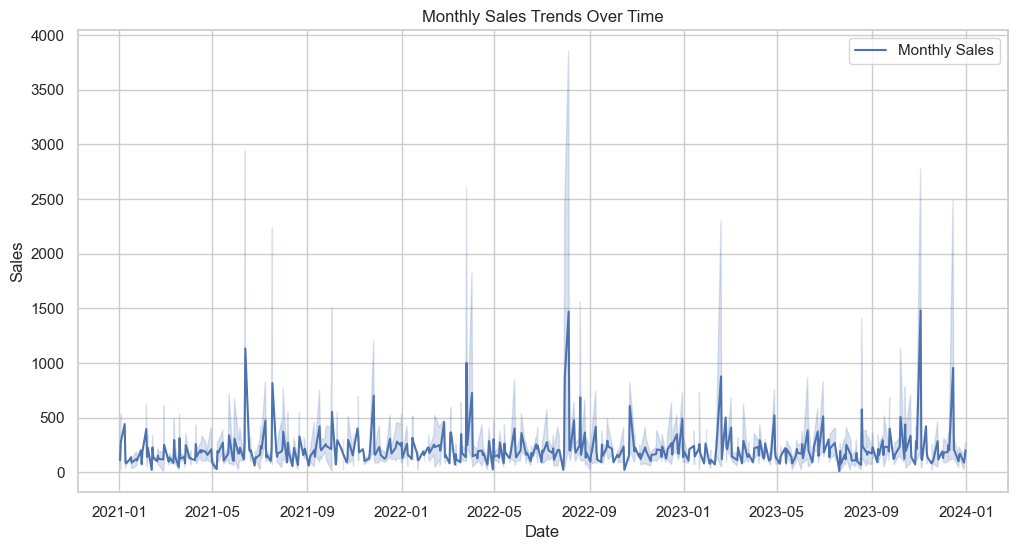

In [13]:
# Visualize monthly and yearly sales trends to identify patterns and seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sale', data=sales_data, label='Monthly Sales')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

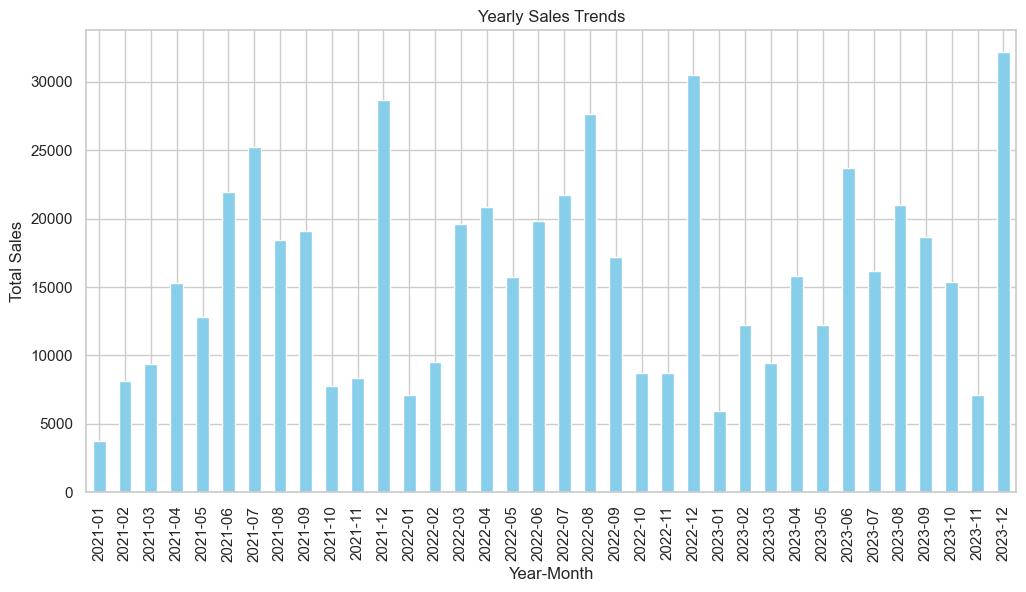

In [14]:
# Extracting and visualizing yearly sales trends
sales_data['YearMonth'] = sales_data['Date'].dt.to_period('M')
yearly_sales = sales_data.groupby('YearMonth')['Sale'].sum()

plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

### 3.2 Top-Selling Artists

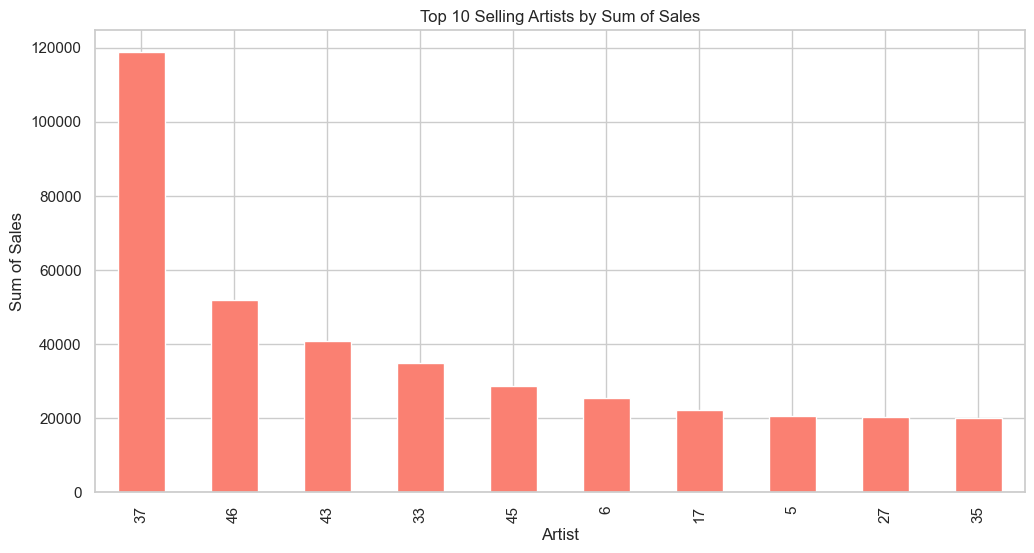

In [66]:
# Identify and visualize the top-selling artists to understand the most successful contributors
top_artists = sales_data.groupby('Artist')['Sale'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title('Top 10 Selling Artists by Sum of Sales')
plt.xlabel('Artist')
plt.ylabel('Sum of Sales')
plt.show()

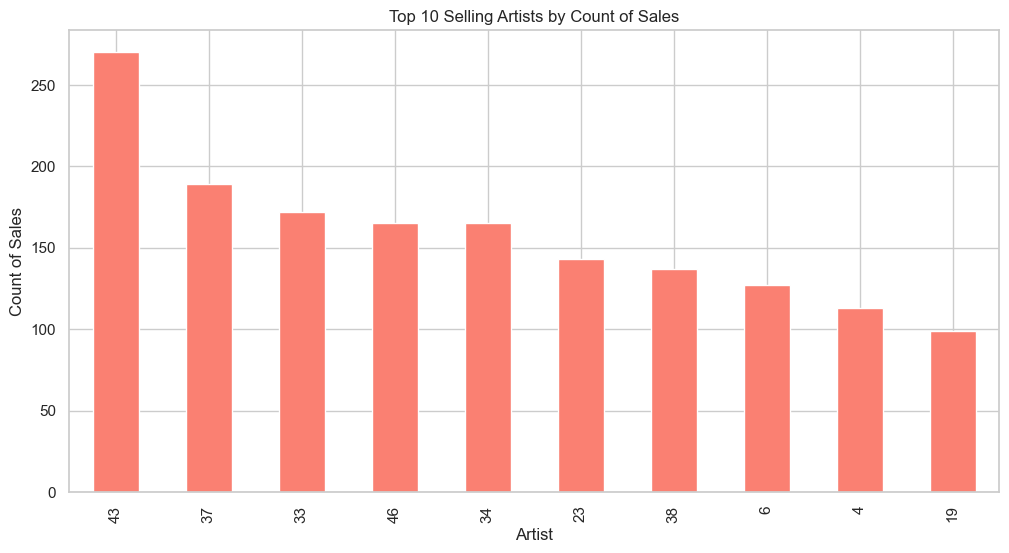

In [67]:
# Identify and visualize the top-selling artists to understand the most successful contributors
top_artists_count = sales_data.groupby('Artist')['Sale'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_artists_sum.plot(kind='bar', color='salmon')
plt.title('Top 10 Selling Artists by Count of Sales')
plt.xlabel('Artist')
plt.ylabel('Count of Sales')
plt.show()

### 3.3 Distribution of Sales Across Days of the Week

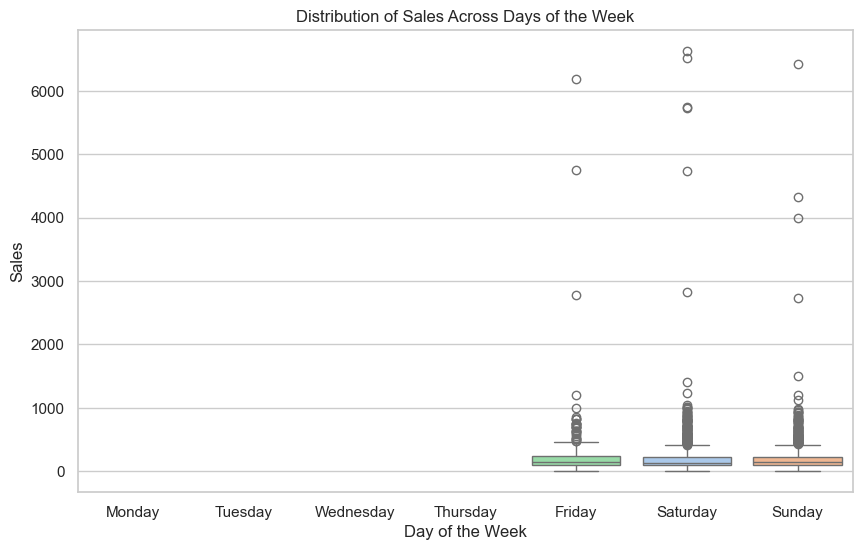

In [16]:
# Explore how sales are distributed across different days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week', y='Sale', data=sales_data, order=day_order, palette='pastel', hue='Day_of_week')
plt.title('Distribution of Sales Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

## Section 4: Insights on Sales Data

### 4.1 Summary of Key Findings

#### Monthly and Yearly Sales Trends
- Monthly sales exhibit consistent sales over the past 3 years.
- Yearly sales show peaks in specific months, suggesting seasonality. December appears to be a peak month.

#### Top-Selling Artists
- Artist '37' stands out as the top performer in number of sales and profitability of sales.
- The next closest artists, '46', '43', and '33', also performed well in boths.

#### Gallery Opening Days
- The gallery appears to be open only on Fridays, Saturdays, and Sundays.

#### Distribution of Sales Across Days of the Week
- The least sales are on Fridays and the most on Saturdays.
- Notably, Saturday has the highest value outliers with Sunday not far behind, indicating occasional exceptional sales on that day.

#### Seasonal Trends
- Sales peak around December and show a drop afterward, with a moderate increase during the summer.

#### Outliers
- There are a significant number of outliers, especially on Saturdays and Sundays.

## Section 5: Deeper Exploration with Second Dataset

### 5.1 Load the Second Dataset

In [17]:
artists_data_path = 'WALRUS_artists.csv'
artists_data = pd.read_csv(artists_data_path)
artists_data.head()

,Unnamed: 0,Artist,Gender,Race,NorthMinneapolisResident,Age,LGBTQ,Promotion_Acceptance
0,9,2,M,W,0,13,0,0
1,16,4,M,W,0,33,0,1
2,29,5,W,B,1,33,0,1
3,17,6,M,W,1,18,0,1
4,24,9,M,S,0,16,0,1


In [18]:
# Drop the Unnamed: 0' column
artists_data.drop('Unnamed: 0', axis=1, inplace=True)

### 5.2 Explore Demographic Information

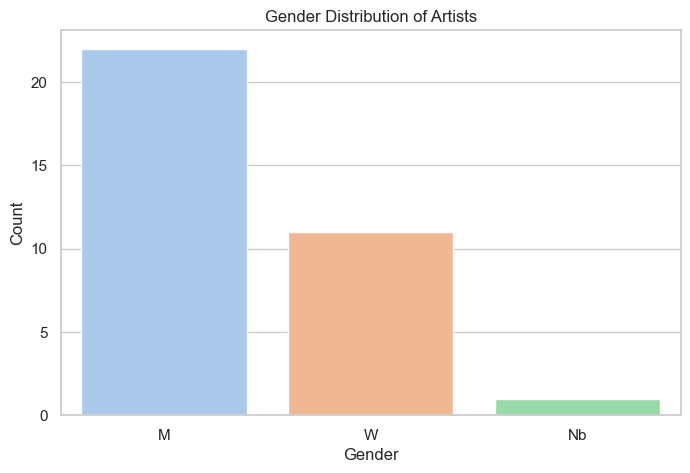

In [19]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=artists_data, palette='pastel', hue='Gender')
plt.title('Gender Distribution of Artists')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

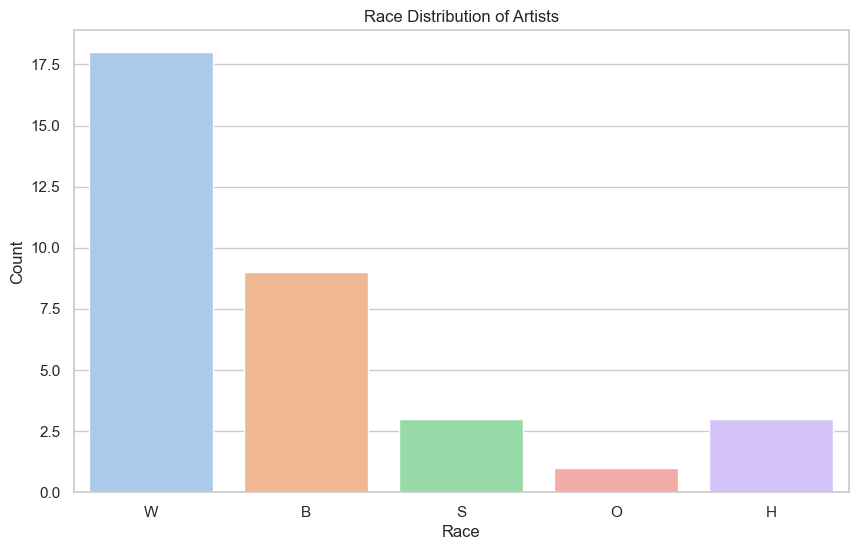

In [20]:
# Race Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', data=artists_data, palette='pastel', hue='Race')
plt.title('Race Distribution of Artists')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

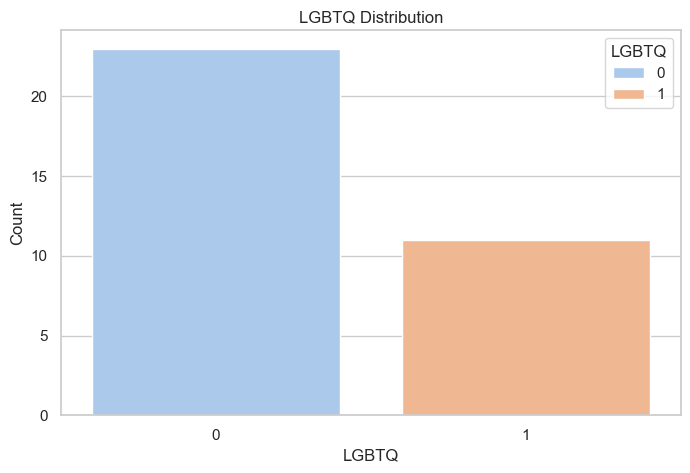

In [21]:
# Promotion Acceptance Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='LGBTQ', data=artists_data, palette='pastel', hue='LGBTQ')
plt.title('LGBTQ Distribution')
plt.xlabel('LGBTQ')
plt.ylabel('Count')
plt.show()

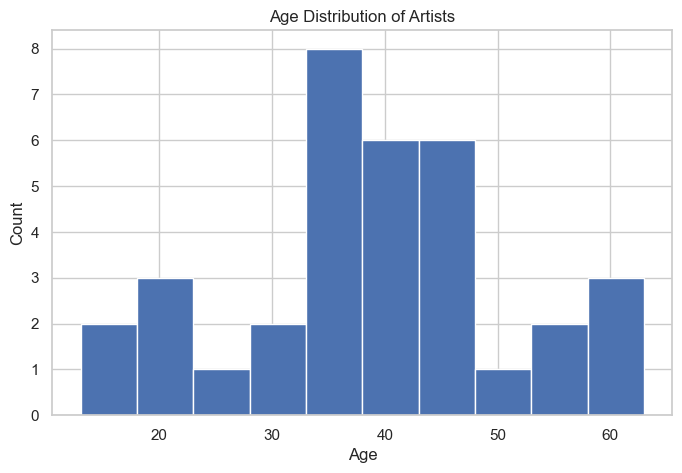

In [22]:
# Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(x='Age', data=artists_data)
plt.title('Age Distribution of Artists')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 5.3 Merge Datasets

In [23]:
# Merge the artists' demographic information with the sales data
merged_data = pd.merge(sales_data, artists_data, on='Artist', how='left')

# Display the merged dataset
print("\nMerged Dataset:")
merged_data.head()


Merged Dataset:


,Date,Year,Month,Artist,Sale,Day_of_week,YearMonth,Gender,Race,NorthMinneapolisResident,Age,LGBTQ,Promotion_Acceptance
0,2021-01-02,2021.0,1.0,38,110.0,Saturday,2021-01,M,B,0,41,1,1
1,2021-01-02,2021.0,1.0,38,110.0,Saturday,2021-01,M,B,0,41,1,1
2,2021-01-03,2021.0,1.0,40,20.0,Sunday,2021-01,W,W,0,47,0,0
3,2021-01-03,2021.0,1.0,37,530.0,Sunday,2021-01,W,S,0,33,0,1
4,2021-01-08,2021.0,1.0,37,440.0,Friday,2021-01,W,S,0,33,0,1


## Section 6: Demographic Analysis and Insights

In [24]:
top_artists = sales_data.groupby('Artist')['Sale'].sum().sort_values(ascending=False).head(10).index.tolist()

top_df = merged_data[merged_data['Artist'].isin(top_artists)]

### 6.1 Gender Distribution

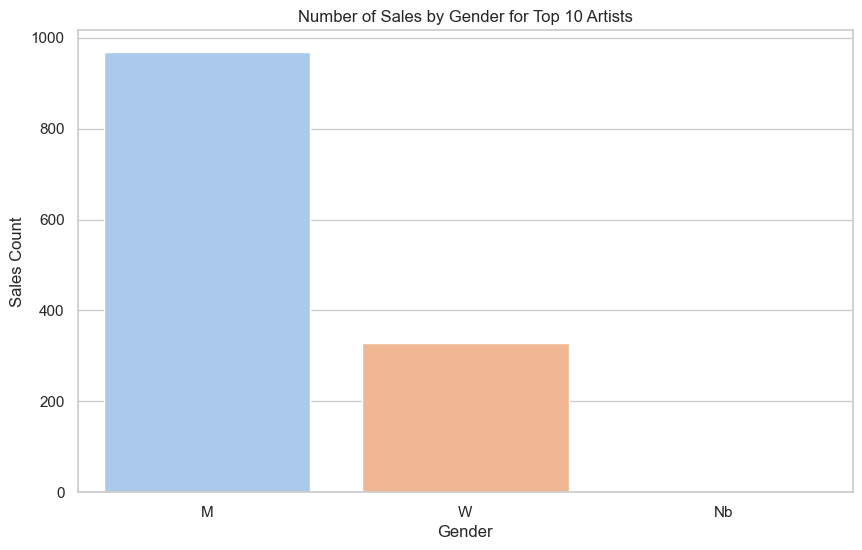

In [50]:
# Countplot of Gender Distribution for Top 10 Artists

gender_order = ['M', 'W', 'Nb']

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=top_df, palette='pastel', hue='Gender', order=gender_order, hue_order=gender_order)
plt.title('Number of Sales by Gender for Top 10 Artists')
plt.xlabel('Gender')
plt.ylabel('Sales Count')
plt.show()

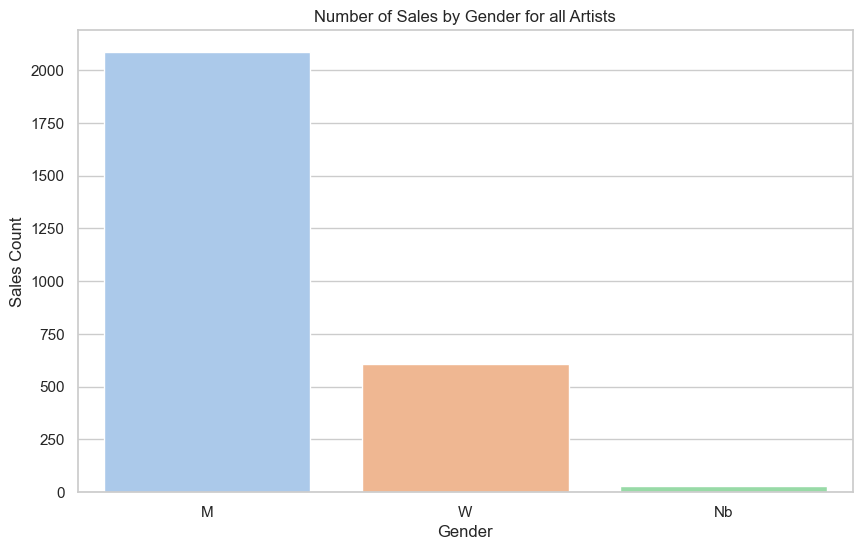

In [51]:
# Countplot of Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=merged_data, palette='pastel', hue='Gender', order=gender_order, hue_order=gender_order)
plt.title('Number of Sales by Gender for all Artists')
plt.xlabel('Gender')
plt.ylabel('Sales Count')
plt.show()

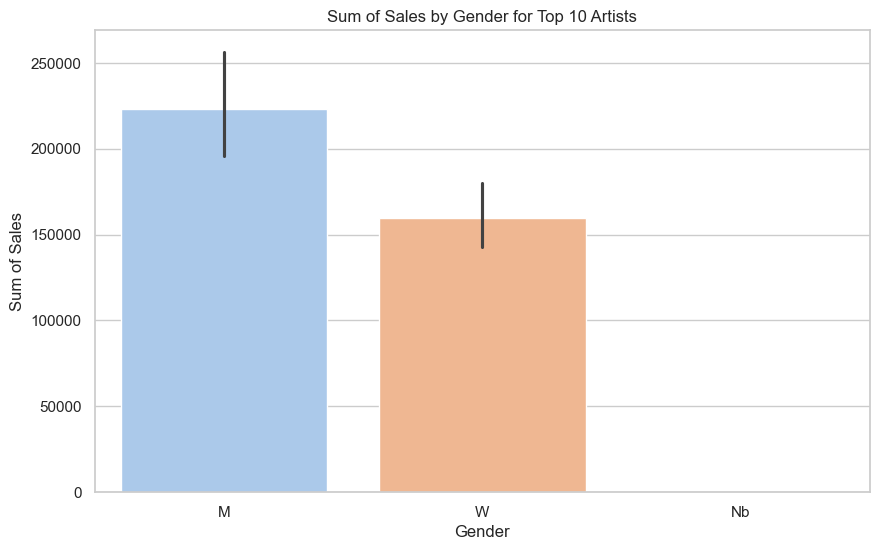

In [56]:
# Creating a bar chart for the sum of 'Sale' for each value of 'Gender'
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Sale', data=top_df, estimator=sum, order=gender_order, hue_order=gender_order, palette='pastel', hue='Gender')

# Adding labels and title
plt.title('Sum of Sales by Gender for Top 10 Artists')
plt.xlabel('Gender')
plt.ylabel('Sum of Sales')

# Displaying the plot
plt.show()

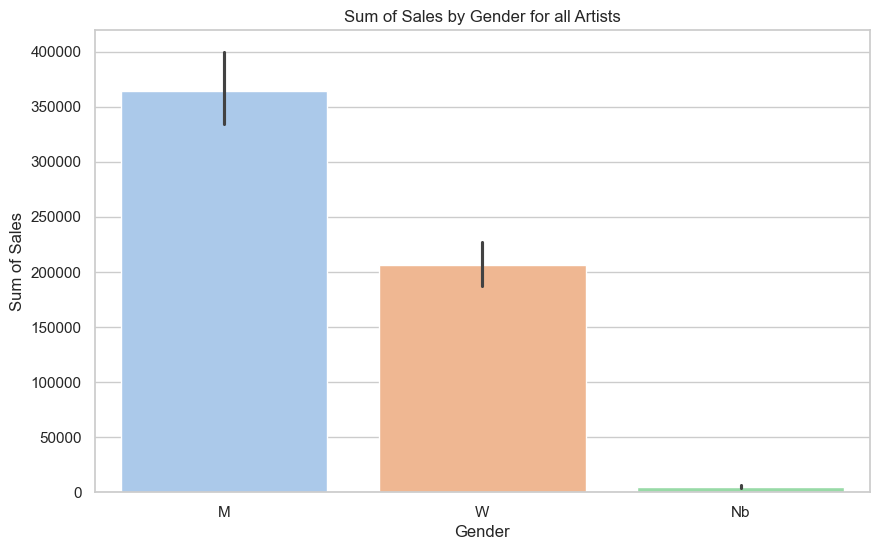

In [57]:
# Creating a bar chart for the sum of 'Sale' for each value of 'Gender'
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Sale', data=merged_data, estimator=sum, order=gender_order, hue_order=gender_order, palette='pastel', hue='Gender')

# Adding labels and title
plt.title('Sum of Sales by Gender for all Artists')
plt.xlabel('Gender')
plt.ylabel('Sum of Sales')

# Displaying the plot
plt.show()

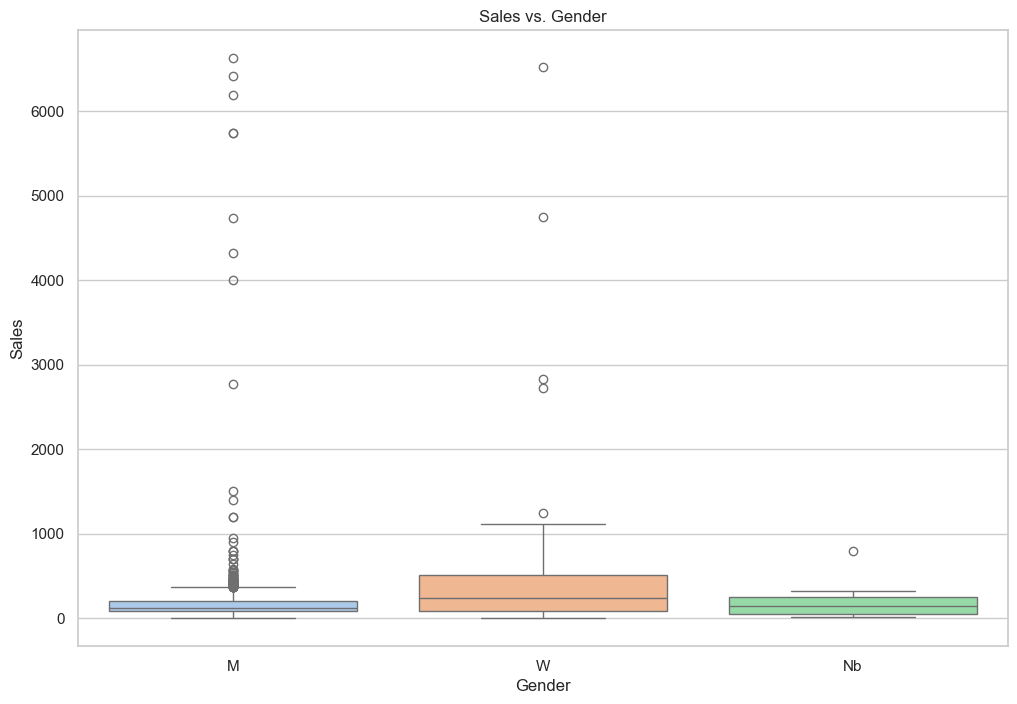

In [27]:
# Boxplot of Sales vs. Gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Sale', data=merged_data, palette='pastel', hue='Gender', order=gender_order, hue_order=gender_order)
plt.title('Sales vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.show()

In [63]:
merged_data.groupby('Gender')['Sale'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
M,2085.0,174.637890,357.032522,0.0,90.0,120.0,200.00,6625.0
Nb,30.0,171.500000,157.212518,20.0,50.0,150.0,251.25,800.0
W,606.0,340.988449,432.016519,8.0,90.0,245.0,510.00,6520.0


In [28]:
# Statistical Analysis - Gender vs. Sales
gender_categories = merged_data['Gender'].unique()

for gender in gender_categories:
    subset = merged_data[merged_data['Gender'] == gender]['Sale']
    print(f"\nStatistical Analysis for {gender} vs. Sales:")
    t_stat, p_value = stats.ttest_ind(subset, merged_data['Sale'])
    print(f"t-statistic: {t_stat}, p-value: {p_value}")


Statistical Analysis for M vs. Sales:
t-statistic: -3.4362397263117463, p-value: 0.000594848689030012

Statistical Analysis for W vs. Sales:
t-statistic: 7.386556901707277, p-value: 1.8954739208764997e-13

Statistical Analysis for Nb vs. Sales:
t-statistic: -0.5784280389384268, p-value: 0.5630225509300639


### 6.2 Race Distribution

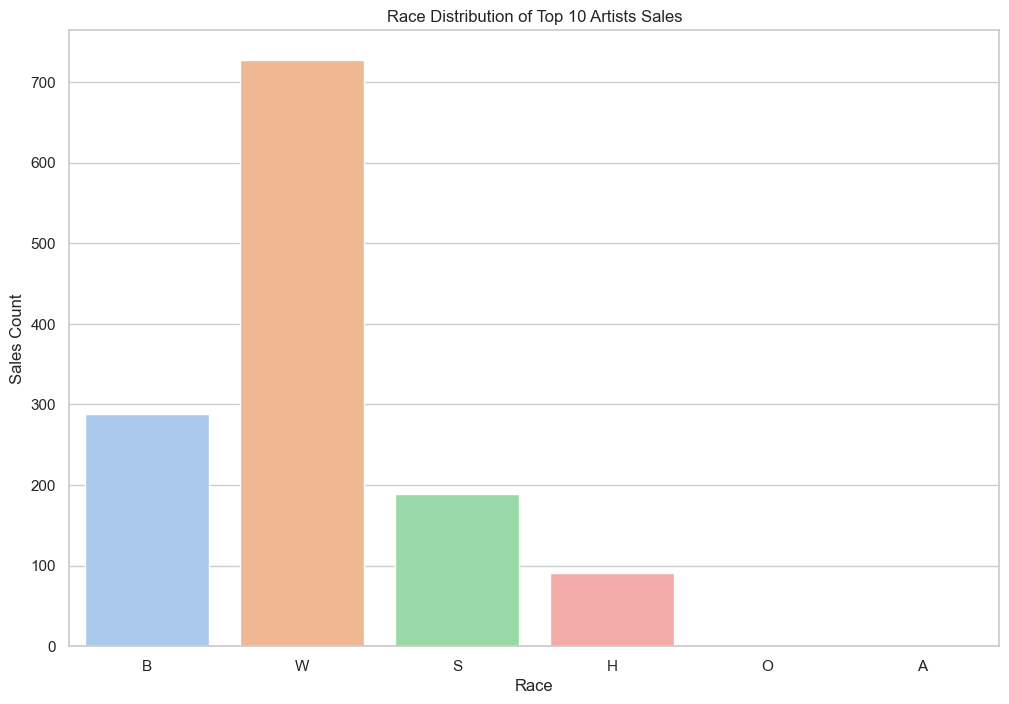

In [38]:
# Countplot of Race Distribution for top 10
race_order = ['B', 'W', 'S', 'H', 'O', 'A']

plt.figure(figsize=(12, 8))
sns.countplot(x='Race', data=top_df, palette='pastel', hue='Race', order=race_order, hue_order=race_order)
plt.title('Race Distribution of Top 10 Artists Sales')
plt.xlabel('Race')
plt.ylabel('Sales Count')
plt.show()

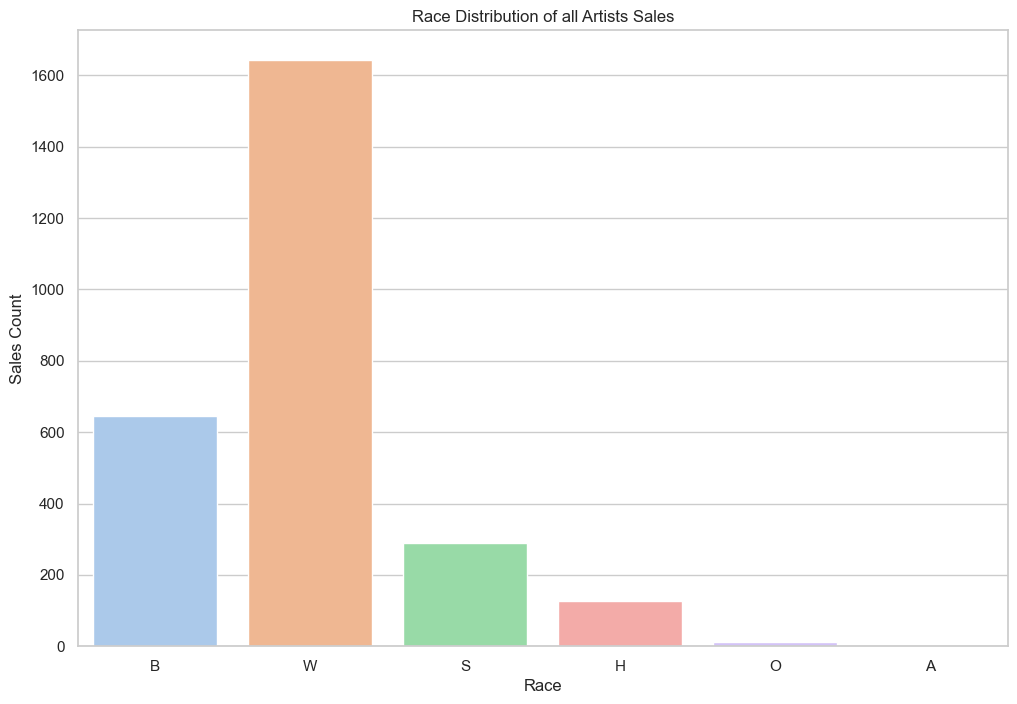

In [68]:
# Countplot of Race Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Race', data=merged_data, palette='pastel', hue='Race', order=race_order, hue_order=race_order)
plt.title('Race Distribution of Top 10 Artists Sales')
plt.xlabel('Race')
plt.ylabel('Sales Count')
plt.show()

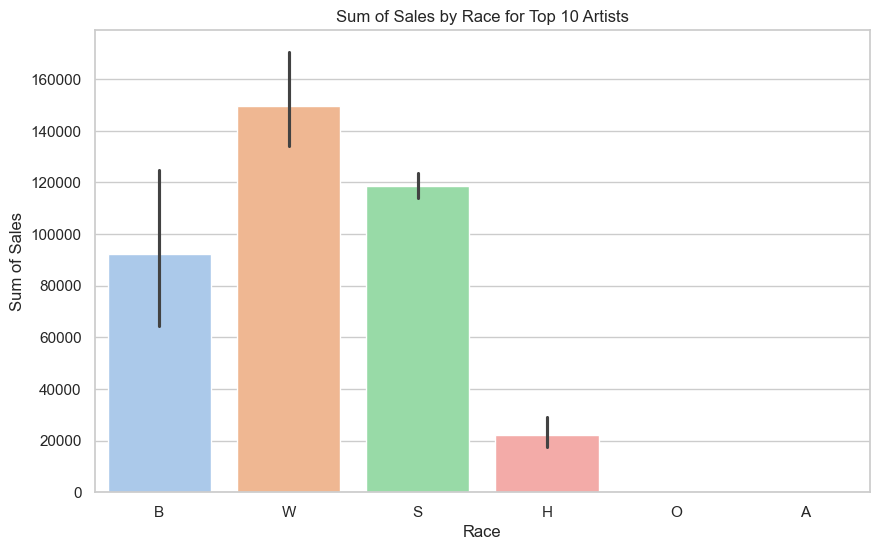

In [59]:
# Creating a bar chart for the sum of 'Sale' for each value of 'Gender'
plt.figure(figsize=(10, 6))
sns.barplot(x='Race', y='Sale', data=top_df, estimator=sum, order=race_order, hue_order=race_order, palette='pastel', hue='Race')

# Adding labels and title
plt.title('Sum of Sales by Race for Top 10 Artists')
plt.xlabel('Race')
plt.ylabel('Sum of Sales')

# Displaying the plot
plt.show()

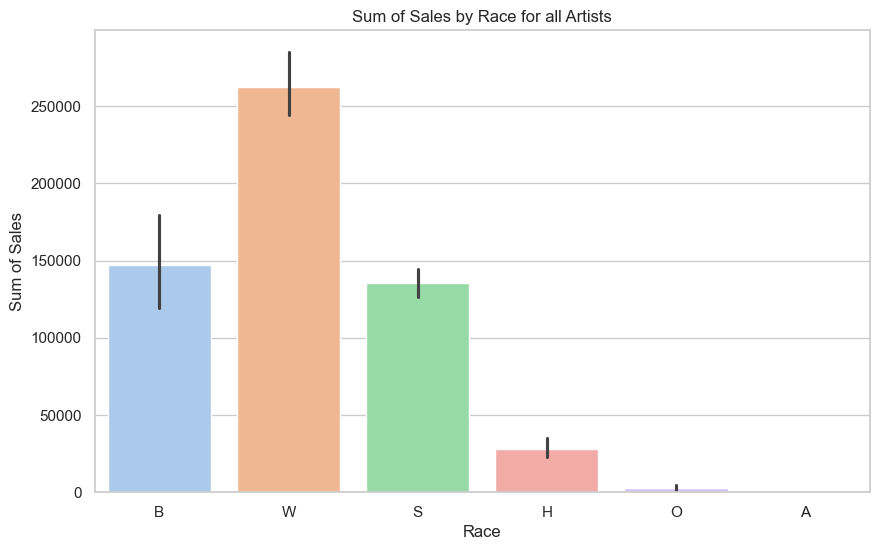

In [60]:
# Creating a bar chart for the sum of 'Sale' for each value of 'Gender'
plt.figure(figsize=(10, 6))
sns.barplot(x='Race', y='Sale', data=merged_data, estimator=sum, order=race_order, hue_order=race_order, palette='pastel', hue='Race')

# Adding labels and title
plt.title('Sum of Sales by Race for all Artists')
plt.xlabel('Race')
plt.ylabel('Sum of Sales')

# Displaying the plot
plt.show()

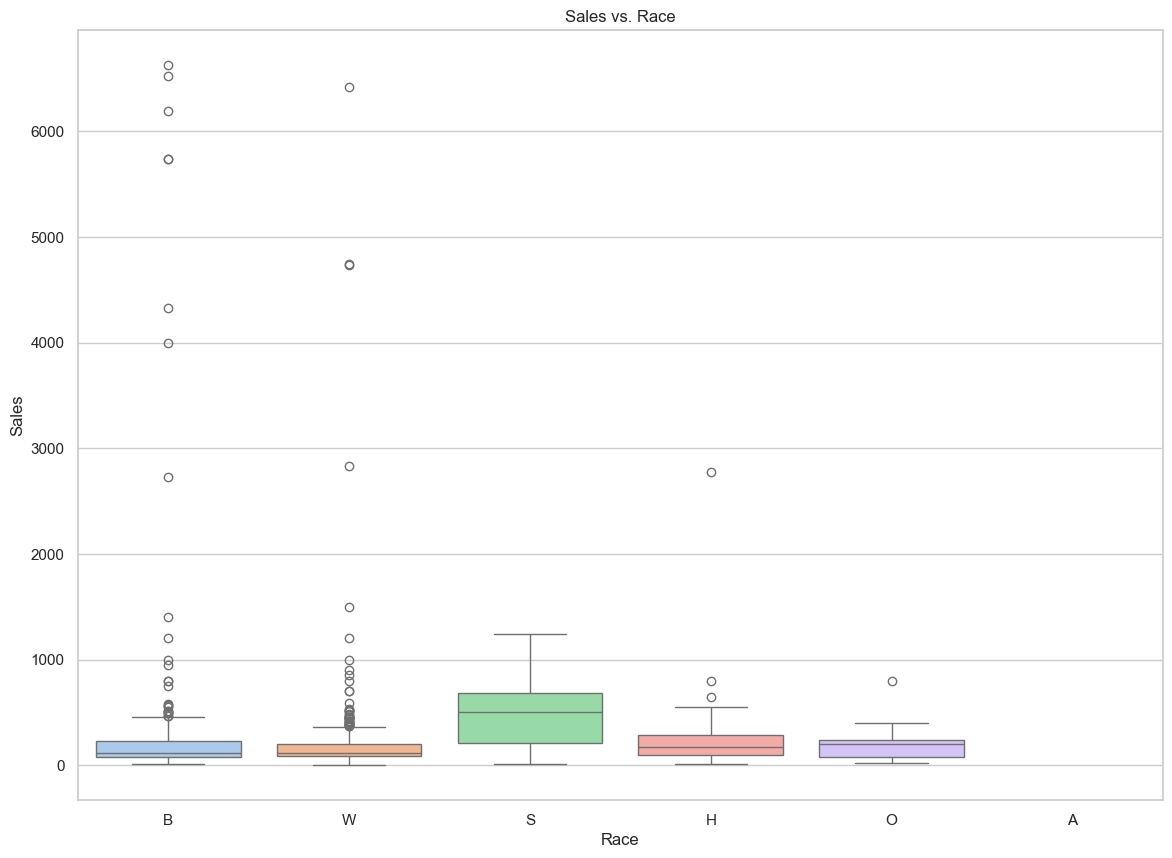

In [40]:
# Boxplot of Sales vs. Race
plt.figure(figsize=(14, 10))
sns.boxplot(x='Race', y='Sale', data=merged_data, palette='pastel', hue='Race', order=race_order, hue_order=race_order)
plt.title('Sales vs. Race')
plt.xlabel('Race')
plt.ylabel('Sales')
plt.show()

In [62]:
merged_data.groupby('Race')['Sale'].describe()

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
B,646.0,227.464396,597.129545,8.0,80.0,120.0,233.75,6625.0
H,128.0,217.710938,269.992247,12.0,97.5,175.0,286.25,2775.0
O,13.0,216.923077,209.558449,20.0,80.0,200.0,240.00,800.0
S,290.0,467.758621,283.432636,10.0,210.0,505.0,687.50,1240.0
W,1644.0,159.747567,253.670883,0.0,90.0,120.0,200.00,6420.0


In [41]:
# Statistical Analysis - Race vs. Sales
race_categories = merged_data['Race'].unique()

for race in race_categories:
    subset = merged_data[merged_data['Race'] == race]['Sale']
    print(f"\nStatistical Analysis for {race} vs. Sales:")
    t_stat, p_value = stats.ttest_ind(subset, merged_data['Sale'])
    print(f"t-statistic: {t_stat}, p-value: {p_value}")


Statistical Analysis for B vs. Sales:
t-statistic: 0.8401495680367369, p-value: 0.40088421936944707

Statistical Analysis for W vs. Sales:
t-statistic: -4.917895216011172, p-value: 9.06968165672657e-07

Statistical Analysis for S vs. Sales:
t-statistic: 11.15660810569325, p-value: 2.3742625963404517e-28

Statistical Analysis for H vs. Sales:
t-statistic: 0.1783829577521755, p-value: 0.8584349241298375

Statistical Analysis for O vs. Sales:
t-statistic: 0.05000274595452199, p-value: 0.9601238553371794


### 6.3 LGBTQ Identification

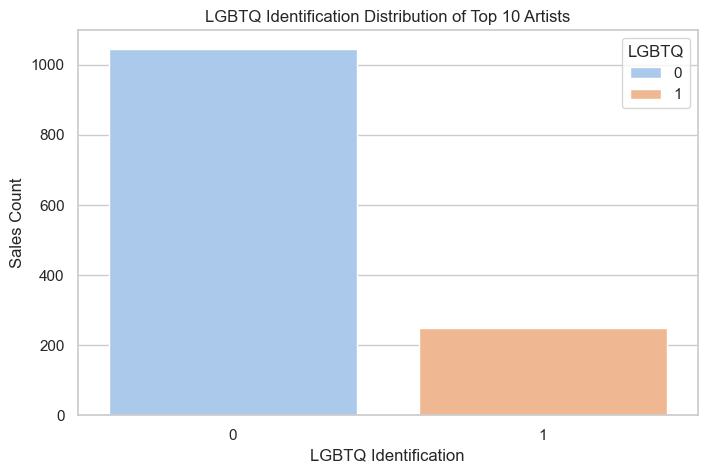

In [42]:
# Countplot of LGBTQ Identification Distribution for top 10 Artists
LGBTQ_order = [0, 1]

plt.figure(figsize=(8, 5))
sns.countplot(x='LGBTQ', data=top_df, palette='pastel', hue='LGBTQ', order=LGBTQ_order, hue_order=LGBTQ_order)
plt.title('LGBTQ Identification Distribution of Top 10 Artists')
plt.xlabel('LGBTQ Identification')
plt.ylabel('Sales Count')
plt.show()

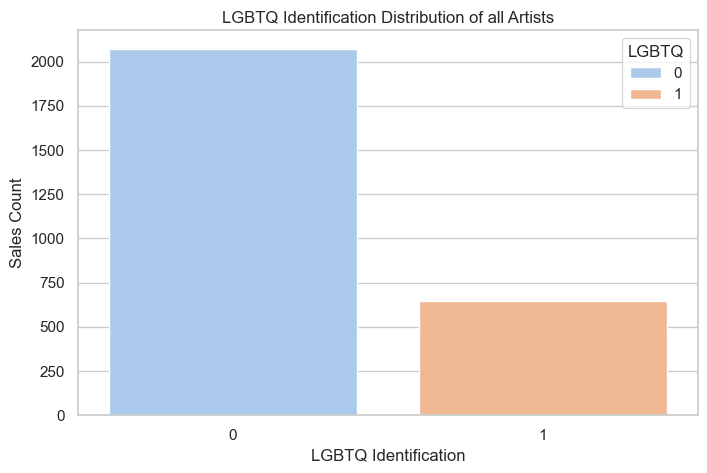

In [43]:
# Countplot of LGBTQ Identification Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='LGBTQ', data=merged_data, palette='pastel', hue='LGBTQ', order=LGBTQ_order, hue_order=LGBTQ_order)
plt.title('LGBTQ Identification Distribution of all Artists')
plt.xlabel('LGBTQ Identification')
plt.ylabel('Sales Count')
plt.show()

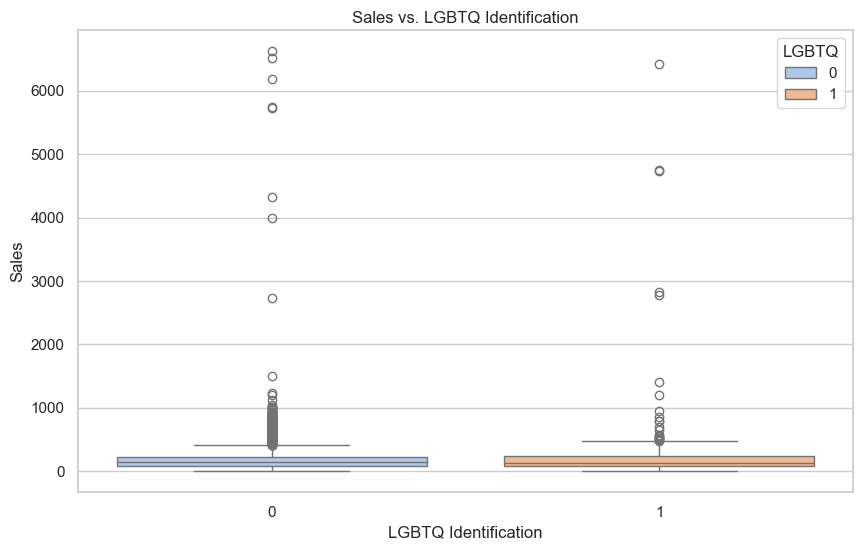

In [44]:
# Boxplot of Sales vs. LGBTQ Identification
plt.figure(figsize=(10, 6))
sns.boxplot(x='LGBTQ', y='Sale', data=merged_data, palette='pastel', hue='LGBTQ', order=LGBTQ_order, hue_order=LGBTQ_order)
plt.title('Sales vs. LGBTQ Identification')
plt.xlabel('LGBTQ Identification')
plt.ylabel('Sales')
plt.show()

In [69]:
merged_data.groupby('LGBTQ')['Sale'].describe()

,count,mean,std,min,25%,50%,75%,max
LGBTQ,,,,,,,,
0,2074.0,214.216972,370.579120,0.0,90.0,140.0,220.0,6625.0
1,647.0,203.428130,408.096974,8.0,80.0,130.0,240.0,6420.0


In [45]:
# Statistical Analysis - LGBTQ vs. Sales
lgbtq_categories = merged_data['LGBTQ'].unique()

for lgbtq in lgbtq_categories:
    subset = merged_data[merged_data['LGBTQ'] == lgbtq]['Sale']
    print(f"\nStatistical Analysis for {lgbtq} vs. Sales:")
    t_stat, p_value = stats.ttest_ind(subset, merged_data['Sale'])
    print(f"t-statistic: {t_stat}, p-value: {p_value}")


Statistical Analysis for 1 vs. Sales:
t-statistic: -0.48785960964587965, p-value: 0.6256810600824065

Statistical Analysis for 0 vs. Sales:
t-statistic: 0.2341699430975336, p-value: 0.8148630498725435


### 6.4 Promotion Acceptance

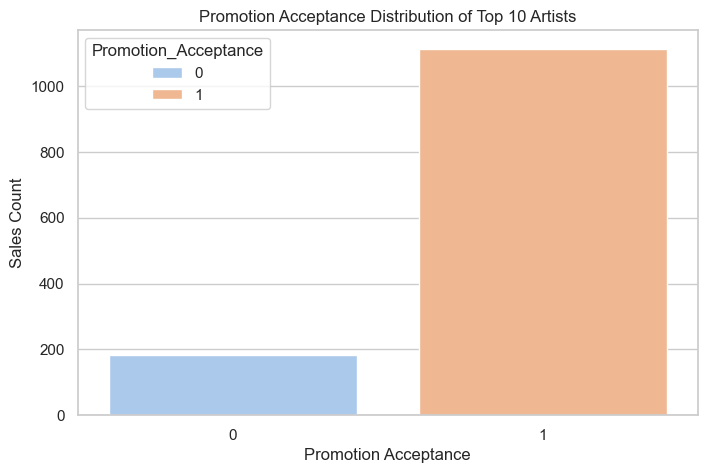

In [46]:
# Countplot of Promotion Acceptance Distribution for Top Artist
plt.figure(figsize=(8, 5))
sns.countplot(x='Promotion_Acceptance', data=top_df, palette='pastel', hue='Promotion_Acceptance')
plt.title('Promotion Acceptance Distribution of Top 10 Artists')
plt.xlabel('Promotion Acceptance')
plt.ylabel('Sales Count')
plt.show()

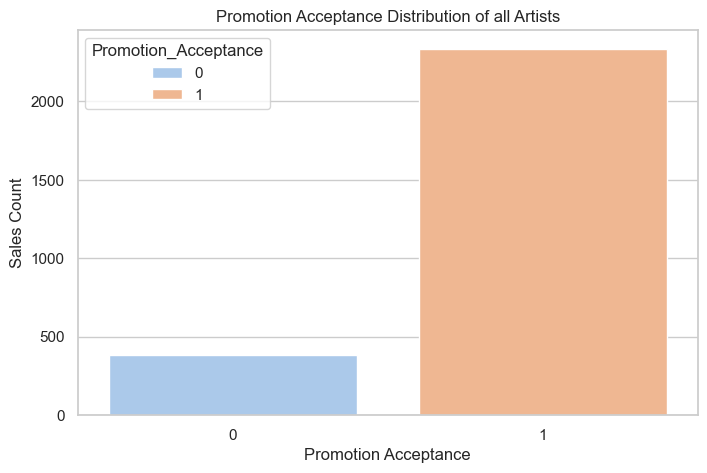

In [47]:
# Countplot of Promotion Acceptance Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Promotion_Acceptance', data=merged_data, palette='pastel', hue='Promotion_Acceptance')
plt.title('Promotion Acceptance Distribution of all Artists')
plt.xlabel('Promotion Acceptance')
plt.ylabel('Sales Count')
plt.show()

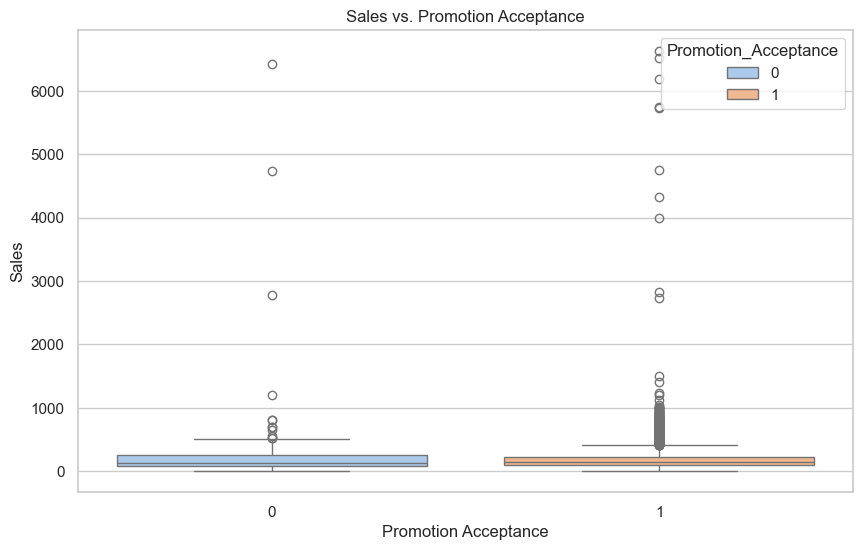

In [48]:
# Boxplot of Sales vs. Promotion Acceptance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion_Acceptance', y='Sale', data=merged_data, palette='pastel', hue='Promotion_Acceptance')
plt.title('Sales vs. Promotion Acceptance')
plt.xlabel('Promotion Acceptance')
plt.ylabel('Sales')
plt.show()

In [71]:
merged_data.groupby('Promotion_Acceptance')['Sale'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion_Acceptance,,,,,,,,
0,384.0,212.375000,441.309285,10.0,80.0,130.0,255.0,6420.0
1,2337.0,211.532734,368.805038,0.0,90.0,140.0,220.0,6625.0


In [49]:
# Statistical Analysis - Promotion Acceptance vs. Sales
promotion_acceptance_categories = merged_data['Promotion_Acceptance'].unique()

for promotion_acceptance in promotion_acceptance_categories:
    subset = merged_data[merged_data['Promotion_Acceptance'] == promotion_acceptance]['Sale']
    print(f"\nStatistical Analysis for {promotion_acceptance} vs. Sales:")
    t_stat, p_value = stats.ttest_ind(subset, merged_data['Sale'])
    print(f"t-statistic: {t_stat}, p-value: {p_value}")


Statistical Analysis for 1 vs. Sales:
t-statistic: -0.011246336624944507, p-value: 0.9910273545062369

Statistical Analysis for 0 vs. Sales:
t-statistic: 0.034209683694690844, p-value: 0.9727121448993024


## Section 7: Actionable Recommendations and Conclusion

#### Optimize Gallery Opening Days
- Evaluate the feasibility of expanding gallery opening days to include Thursdays or additional weekdays for more even sales distribution.

#### Artist-Specific Strategies
- Collaborate with top-performing Artist '37': Recognizing that Artist '37' leads in sales with nearly $120,000, engage in discussions to understand and potentially replicate successful sales strategies.
- Support high-performing artists '46', '43', and '33': Tailor initiatives to maintain and potentially increase their sales based on continuous engagement and market analysis.
- Provide personalized assistance to other artists: Understanding individual needs and preferences is crucial for fostering a diverse and successful artist community.

#### Seasonal Promotions
- Develop themed seasonal promotions and marketing campaigns, especially around December and the summer, to attract a broader audience.

#### Sunday Specials
- Investigate factors contributing to exceptional Sunday sales and implement special promotions or events on this day.

#### Outlier Analysis
- Conduct a detailed analysis of high-value outliers on Saturdays and Sundays to understand and replicate success on other days.

#### Demographic Tailored Promotions
- Tailor promotions based on gender, race, LGBTQ identification, and promotion acceptance: Despite no significant differences in gender, emphasize diversity and inclusion in promotional strategies.

#### Collaborations and Events
- Explore collaborations with top-selling artists for increased visibility and diverse audience engagement.
- Organize events aligned with the gallery's brand to attract art enthusiasts.

#### Continuous Analysis
- Establish a routine for continuous data analysis to monitor the effectiveness of implemented strategies.
- Regularly assess sales trends, artist performances, and customer engagement to refine approaches.

### 7.1 Demographic Analysis Summary

#### Gender
- Analysis revealed significant differences between Man (M), Nonbinary (Nb), and Woman (W) artists. 

    **Strategies for Gender:**
  
    - Promote Equal Visibility: Ensure equal visibility for all artists in promotional materials, online platforms, and gallery displays.
    - Offer Diverse Artwork: Encourage a diverse range of artworks to attract a broader audience.

#### Race
- Analysis revealed significant differences in sales across racial categories (B - Black, H - Hispanic, O - Other, S - Asian, W - White).

    **Strategies for Race:**
  
    **Black Artists (B):**
    Insights: Average sales are \\\$227, with a maximum of \\\$6625.
    Strategies:
    - Highlight Diversity: Emphasize the diversity of artworks by Black artists to attract a broader audience.
    - Collaborate on Themes: Work with Black artists to create thematic exhibitions that resonate with the community.

    **Hispanic Artists (H):**
    Insights: Average sales are \\\$217, with a maximum of \\\$2775.
    Strategies:
    - Cultural Celebrations: Organize events celebrating Hispanic culture to enhance visibility.
    - Highlight Hispanic Artists: Feature Hispanic artists prominently in promotional materials.

    **Other Artists (O):**
    Insights: Limited data with an average of \\\$216 and a maximum of \\\$800.
    Strategies:
    - Individual Artist Spotlight: Showcase individual artists from the "Other" category to explore unique perspectives.

    **Asian Artists (S):**
    Insights: Average sales are \\\$467, with a maximum of \\\$1240.
    Strategies:
    - Community Engagement: Engage with the Asian community through partnerships and collaborative events.
    - Artwork Themes: Tailor promotions to align with themes resonating with the Asian audience.

    **White Artists (W):**
    Insights: Average sales are \\\$159, with a maximum of \\\$6420.
    Strategies:
    - Diverse Art Genres: Encourage a diverse range of art genres within the White artist community.
    - Collaborate on Seasonal Themes: Work with White artists to align artworks with seasonal trends for increased visibility.

#### LGBTQ Identification
- The analysis of sales based on LGBTQ identification (1 - identifies as LGBTQ, 0 - does not) did not yield significant differences. Both groups showed similar sales patterns.

#### Promotion Acceptance
- The analysis of sales based on promotion acceptance (1 - accepted, 0 - did not accept) indicated no significant differences. Artists who accepted promotions and those who did not exhibited similar sales outcomes.

### 7.2 Actionable Insights

#### Diversity and Inclusion
- Leverage the statistical differences in sales across racial categories to emphasize diversity and inclusion in promotional strategies. Tailor promotions to different demographic groups to foster a more inclusive art community.

#### Further Exploration
- The current analysis provides a snapshot, and ongoing exploration is encouraged. Collecting additional data and refining demographic categories may reveal nuanced patterns over time.

#### Continuous Monitoring
- Implementing the recommended strategies from previous sections and continuously monitoring sales trends will enable adaptive decision-making based on evolving market dynamics.

### 7.3 Limitations and Future Directions

#### Small Sample Size
- The current dataset may have limitations due to a relatively small sample size. Expanding the dataset could provide more robust insights.

#### Additional Variables
- Consider incorporating additional variables, such as specific art genres, to enhance the granularity of the analysis and capture more nuanced patterns.

#### Collaboration with Artists
- Collaborating closely with artists to understand individual preferences and sales strategies can provide valuable qualitative insights.

### 7.4 Summary
While statistical analyses revealed significant differences in sales between Man (M), Nonbinary (Nb), and Woman (W) artists, the importance of diversity, inclusion, and continuous exploration remains paramount. Implement tailored strategies and remain attentive to evolving trends for the overall success of WALRUS art gallery.